<a href="https://colab.research.google.com/github/MK316/workshop22/blob/main/class01_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📘 **Class 01 Reading**

**Table of Contents:**

* Preview of texts (using 📍_wordcloud_)
* Finding keywords (using 📍_frequency distribution_)
* Text by Paragraphs (using 📍_dataframe_)
* Reading paragraphs with sounds (using 📍_gTTS_: Text-to-Speech) 

💾 Sample text: Ch01. [Visual village](https://raw.githubusercontent.com/MK316/workshop22/main/data/RE.Ch01.txt) Copy and get it ready to past below :-)

In [23]:
#@markdown 🔳 Paste the text here for analysis:
text = input()

Before the age of the smartphone, aspiring photographers had to learn how to use high-tech cameras and photographic techniques. Not everyone had cameras, and it took skill and a good eye to capture and create a great photograph. Today, with the huge range of camera apps on our smartphones, we are all amateur photographers. And pretty good ones, too: The quality of smartphone images now nearly equals that of digital cameras. The new ease of photography has given us a tremendous appetite for capturing the magical and the ordinary. We are obsessed with documenting everyday moments, whether it’s a shot of our breakfast, our cat – or our cat’s breakfast. And rather than collect pictures in scrapbooks, we share, like, and comment on them with friends and strangers around the globe. Even photojournalists are experimenting with cell phones because their near invisibility makes it easier to capture unguarded media. They can now act as their own publishers – reaching huge audiences via social me

## **[1] Preview of text**

In [24]:
#@markdown 🔳 Text information: text length with word count

text1 = text.split()
text1 = [w for w in text1 if len(w) >1]
print('This text contains %d'%len(text1), 'words.')

This text contains 759 words.


In [ ]:
#@markdown 🔳 Sentence length:

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

#@markdown => Text info as a dataframe: sentence length included

sents = sent_tokenize(text)
print('Number of sentences: %d'%len(sents))

import pandas as pd

df = pd.DataFrame()

df['SID'] = range(1,len(sents)+1)
df['Sentence'] = sents

sleng = []
for i in range(0, len(sents)):
  n = len(sents[i].split())
  sleng.append(n)

df['S_length'] = sleng

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


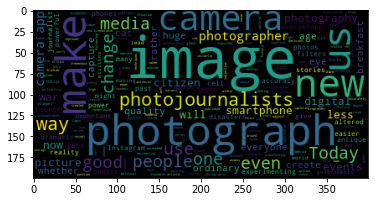

In [35]:
#@markdown 🔳 Wordcloud: _**Let's see what the text is about.**_

import nltk
nltk.download("punkt")

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(text) 
plt.imshow(wc)

##**[2] Finding keywords**: 

In [45]:
#@markdown Install package {corpus-toolkit}
%%capture
!pip install corpus-toolkit

In [ ]:
#@markdown 🔳 Tagging the text
import os
os.mkdir("txtdata")

with open('txtdata/myfile.txt', 'w') as f:
    f.write(text)

from corpus_toolkit import corpus_tools as ct
txt_corp = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(txt_corp) #tokenize corpus - by default this lemmatizes as well
word_freq = ct.frequency(tok_corp) #creates a frequency dictionary

# tagged_txt (tagged data folder), txtdata (original data folder)
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

#@markdown 🔳 Show top 10 high frequency words (tagged)

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 20)

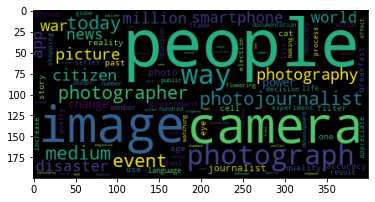

In [115]:
#@markdown 🔳 Wordcloud with Keywords (nouns)

import pandas as pd

my_dict = tagged_freq
df = pd.DataFrame(list(my_dict.items()),columns = ['Words','Freq']) 

df1 = df.sort_values(by=['Freq'], ascending = False)

import re
lists = df1['Words']
result_n = [w for w in lists if re.search('NOUN$', w)]
result_n[:10]

txt = ' '.join(result_n)
test = txt.replace("_NOUN","")

wc = WordCloud().generate(test) 
plt.imshow(wc)

##**[3] Dividing text into Paragraphs**: 

Save a file and upload it on Colab  
[Text file](https://raw.githubusercontent.com/MK316/workshop22/main/data/RE.Ch01.txt) => right-click to save (save it as Ch01.txt on your computer)

In [125]:
#@markdown 🔳 Reading a file by linebreak (paragraphs)
a_file = open("Ch01.txt")
file_contents = a_file.read()
contents_split = file_contents.splitlines()

print(contents_split)
print('There are %d'%len(contents_split), 'paragraphs in this text.')

['Before the age of the smartphone, aspiring photographers had to learn how to use high-tech cameras and photographic techniques. Not everyone had cameras, and it took skill and a good eye to capture and create a great photograph. Today, with the huge range of camera apps on our smartphones, we are all amateur photographers. And pretty good ones, too: The quality of smartphone images now nearly equals that of digital cameras.', 'The new ease of photography has given us a tremendous appetite for capturing the magical and the ordinary. We are obsessed with documenting everyday moments, whether it’s a shot of our breakfast, our cat – or our cat’s breakfast. And rather than collect pictures in scrapbooks, we share, like, and comment on them with friends and strangers around the globe.', 'Even photojournalists are experimenting with cell phones because their near invisibility makes it easier to capture unguarded media. They can now act as their own publishers – reaching huge audiences via s

In [123]:
#@markdown 🔳 Paragraphs as dataframe (df1)
df1 = pd.DataFrame()

df1['PID'] = range(1, len(contents_split)+1)
df1['Paragraph'] = contents_split

df1.head()

,PID,Paragraph
0,1,"Before the age of the smartphone, aspiring pho..."
1,2,The new ease of photography has given us a tre...
2,3,Even photojournalists are experimenting with c...
3,4,"In the past, magazines published unforgettable..."
4,5,Cameras are everywhere – a situation that is t...


In [ ]:
#@markdown 🔳 Show Paragraph:

paragraphs = df1['Paragraph']
paragraphs = list(paragraphs)
paragraphs

paragraph_number = "2" #@param [1,2,3,4,5,6,7,8,9,10,11,12]
n = int(paragraph_number)

print('Paragraph number %d:'%n)
print(paragraphs[n])

txt = paragraphs[n]

#@markdown 🔳 Show sentences in the given paragraph:
from nltk.tokenize import sent_tokenize
nltk.download("punkt")

sent_n = sent_tokenize(txt)

for i in range(0,len(sent_n)):
  print('Sentence %d:'%(i+1), sent_n[i])


##**[4] Paragraph reading**: using TTS (Text-to-Speech)

In [146]:
#@markdown 🚩 {gTTS} package installation and import
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

In [163]:
#@markdown 🚩 Making a function { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "ko" #@param ["en", "fr","ko",'es']
  # lang = language_to_choose

  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = False)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

#@markdown 🚩 Type text to say
text_to_say = input()

tts(text_to_say)

Hello, my name is TTS. Nice to meet you.
Play language accent: ko


## 🔈 Paragraph reading with intro sentence "This is the nth sentence."

In [153]:
#@markdown 🚩 Making a function { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
  # lang = language_to_choose

  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = False)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

In [161]:
#@markdown 📗 Creating the audio file of selected Paragraph N: 

#@markdown Type the number of paragrahs(1~12)
para_num = input()

paragraphs = df1['Paragraph']
paragraphs = list(paragraphs)
paragraphs

num = int(para_num)

text_to_say = paragraphs[num]

numtext = ["1st", "second", "third","fourth","fifth","sixth","seventh","eighth","ninth","tenth","eleventh","twelfth","thirteenth","fourteenth","fifteenth"]
print(text_to_say)
intro = "This is the" + numtext[num-1] + "sentence."

text = intro + text_to_say
tts(text)

5
As people everywhere embrace photography and the media make use of citizen journalist, professional standards appear to be shifting. In the past, most people trusted photojournalists to accurately represent reality. Today, however, digital images can be altered in ways the naked eye might never notice. Any image can be altered to create an “improved” picture of reality. The average viewer is left with no way to assess the accuracy of an image except through trust in a news organization or photographer.
Play language accent: en
